**Öğrenci Performans Analizi ve Tahmini**

Bu veri seti, demografik özelliklerini, çalışma alışkanlıklarını, ebeveyn katılımını, ders dışı aktivitelerini ve akademik performanslarını ayrıntılı olarak açıklayan 2.392 lise öğrencisi hakkında kapsamlı bilgiler içerir. Hedef değişken GradeClass, öğrencilerin notlarını farklı kategorilere sınıflandırarak eğitim araştırması, öngörücü modelleme ve istatistiksel analiz için sağlam bir veri seti sağlar.

**1. Gerekli Kütüphanlerin Kurulumu**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

sns.set_theme(context='notebook', palette='pastel', style='whitegrid')

**2. Veriyi Anlamlandırma**

In [3]:
df = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [6]:
# Count duplicated rows in the DataFrame
sum(df.duplicated())

0

In [7]:
# Drop unnecessary column from the DataFrame
df.drop(['StudentID', 'GPA'], axis=1, inplace=True)

df.shape

(2392, 13)

- Veri kümesi toplam 2.392 gözlem içeriyor.
- Veri kümesindeki tüm değerler boş değil ve sayısaldır.
- Yinelenen kayıt yok.
- Hedef değişkenimiz `GradeClass`, bu nedenle `GPA` sütunu kaldırılmalıdır, çünkü bu sütunlar benzer bilgiler verir.
`StudentID` ve `GPA` sütunları kaldırıldıktan sonra, veri kümesi 13 sütundan oluşur.

**3. Veri Görselleştirme**

In [8]:
# Identify numerical columns: columns with more than 5 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]

# Identify categorical columns: columns that are not numerical and not 'GradeClass'
categorical_columns = df.columns.difference(numerical_columns).difference(['GradeClass']).to_list()

**3.1. Kategorik Özelliklerin Dağılımı**

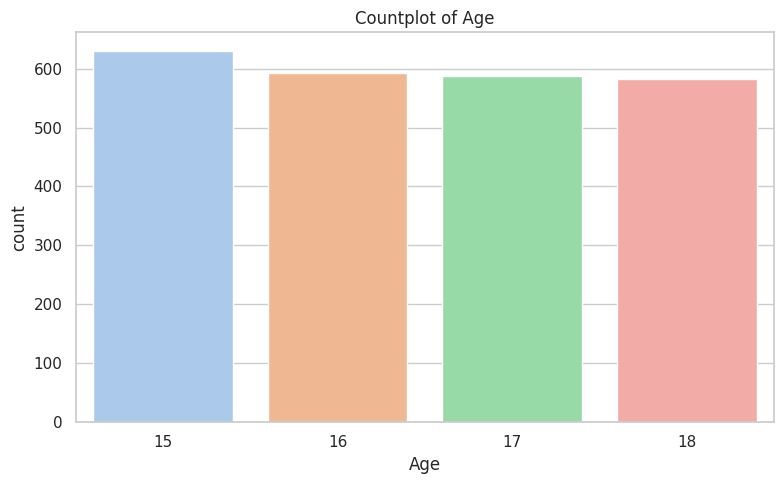

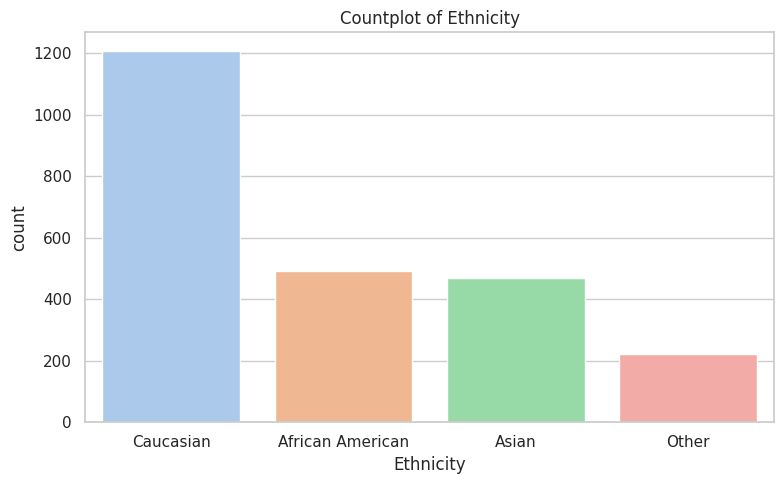

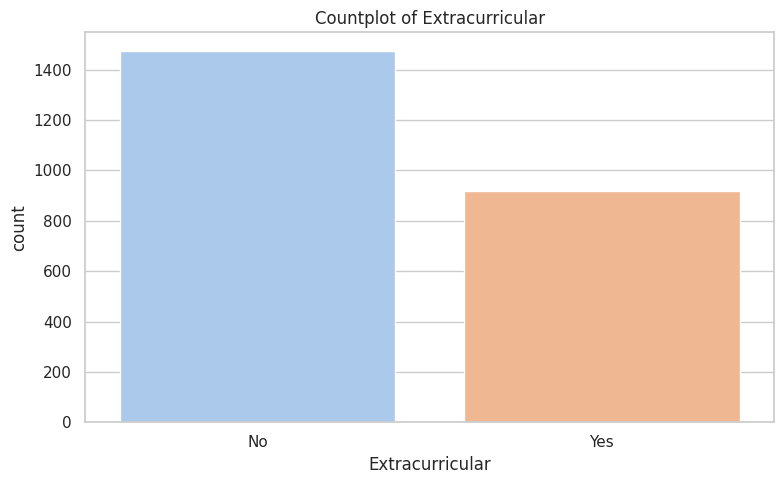

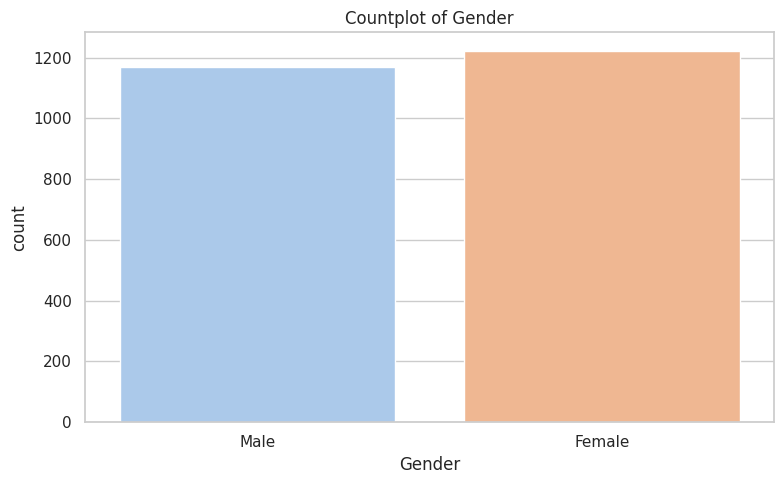

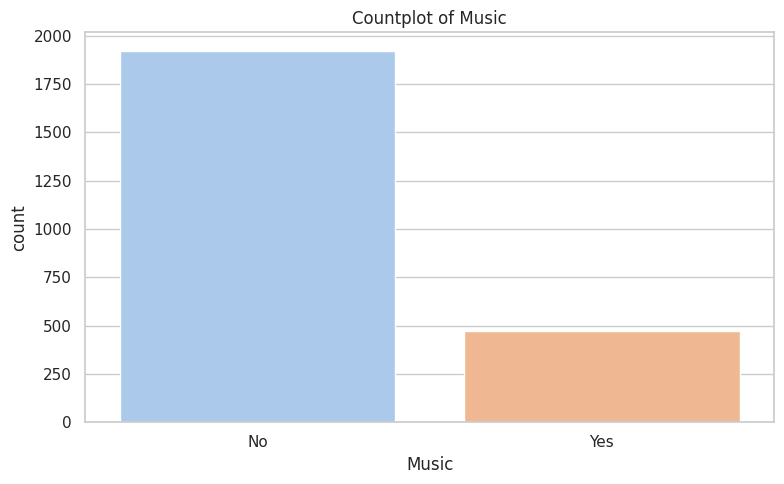

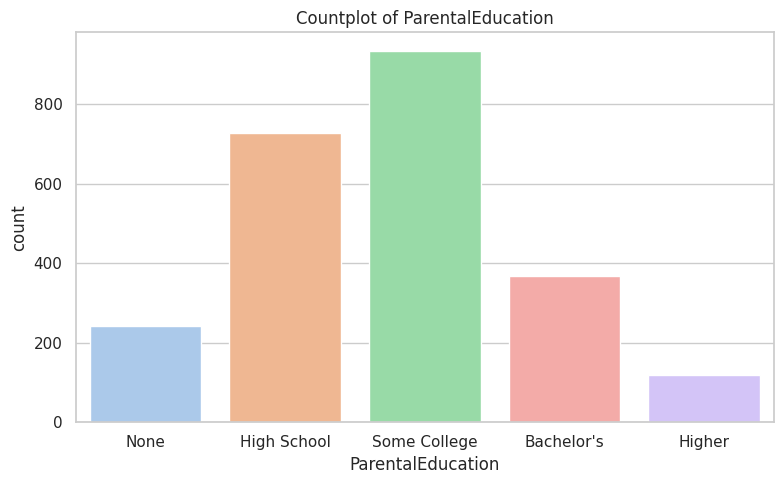

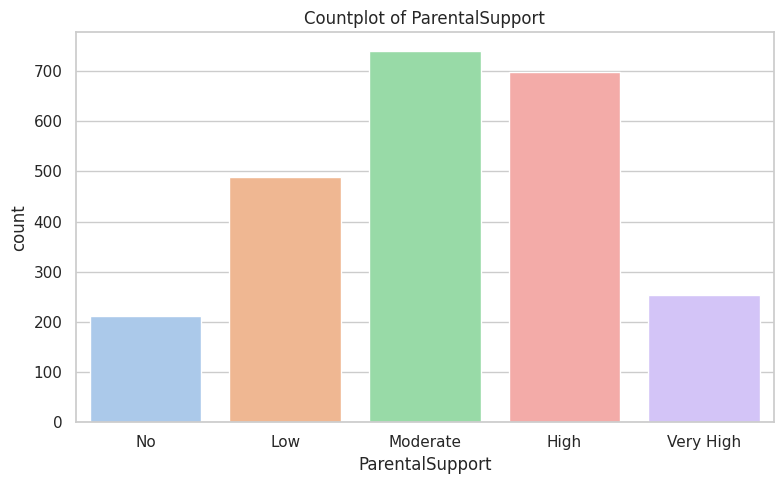

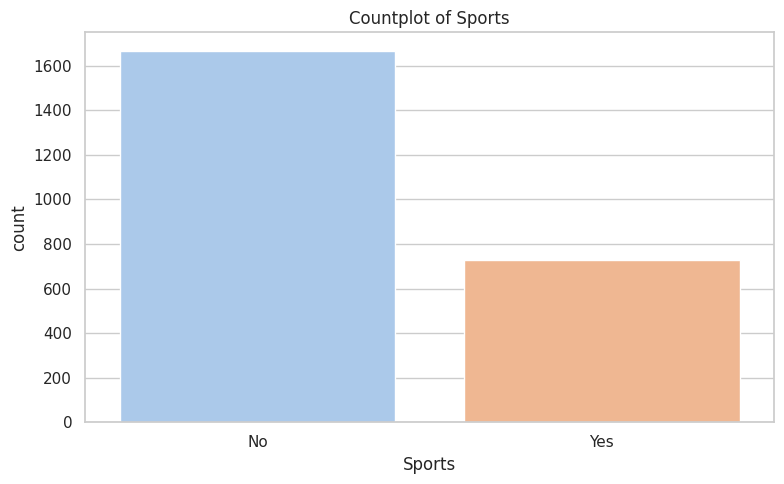

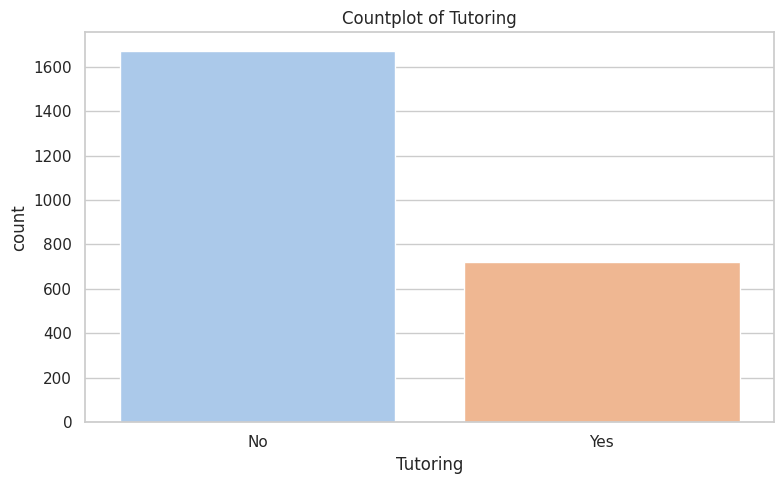

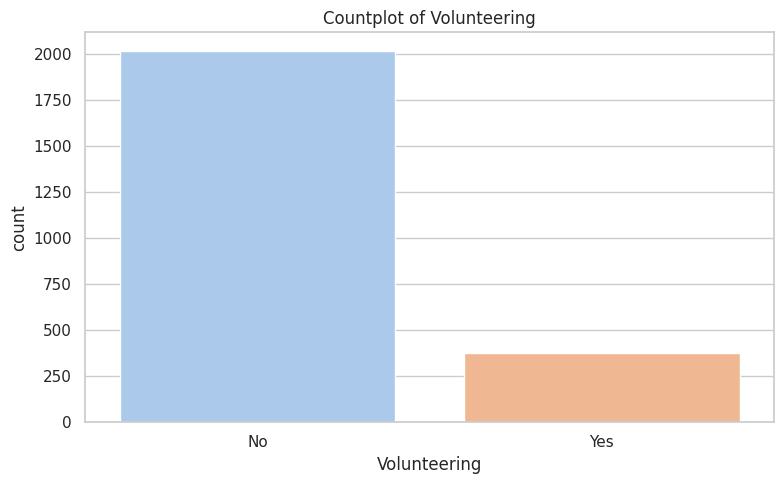

In [9]:
# Custom labels for the categorical columns
custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Age': [15, 16, 17, 18],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.tight_layout()
    plt.show()

- Yaş dağılımı dengelidir ve 15 ila 18 yaş aralığındaki bireyler eşit temsil edilmektedir.
- En çok temsil edilen demografik grup Kafkasyalılardır.
- Özellikle, veri setinde hem kadınlar hem de erkekler eşit şekilde temsil edilmektedir.
- Çok sayıda birey müzik, spor, özel ders, gönüllülük veya başka herhangi bir ders dışı aktiviteye katılmamaktadır.
- Çoğu ebeveynin üniversite eğitimi vardır, bunu lise mezunları ve lisans derecesine sahip olanlar takip eder.
- Ebeveyn desteği normal bir dağılıma uymaktadır ve çoğu ebeveyn orta düzeyde destek sağlamaktadır.

**3.2. Sayısal Özelliklerin Dağılımı**

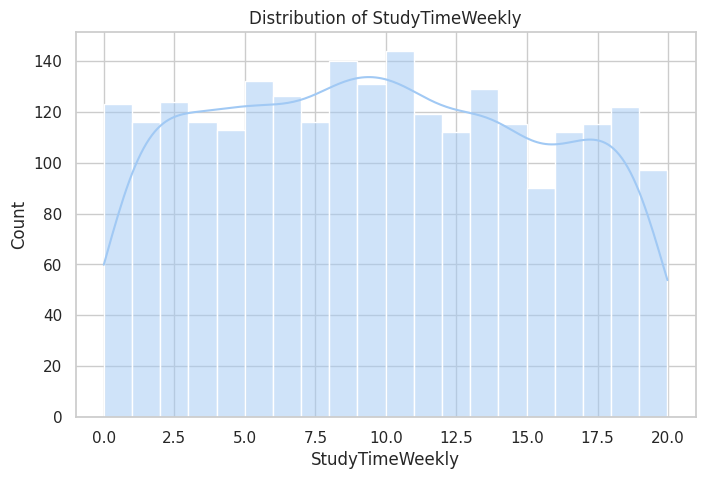

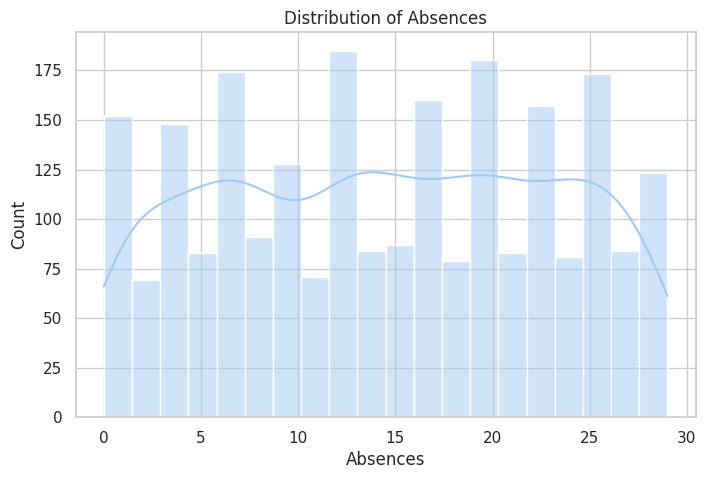

In [10]:
# Plot histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

- Devamsızlıkların dağılımı (absence) oldukça değişkendir. Net bir desen yoktur ancak önemli dalgalanmalar vardır.

**3.3. Korelasyonları Keşfetmek**

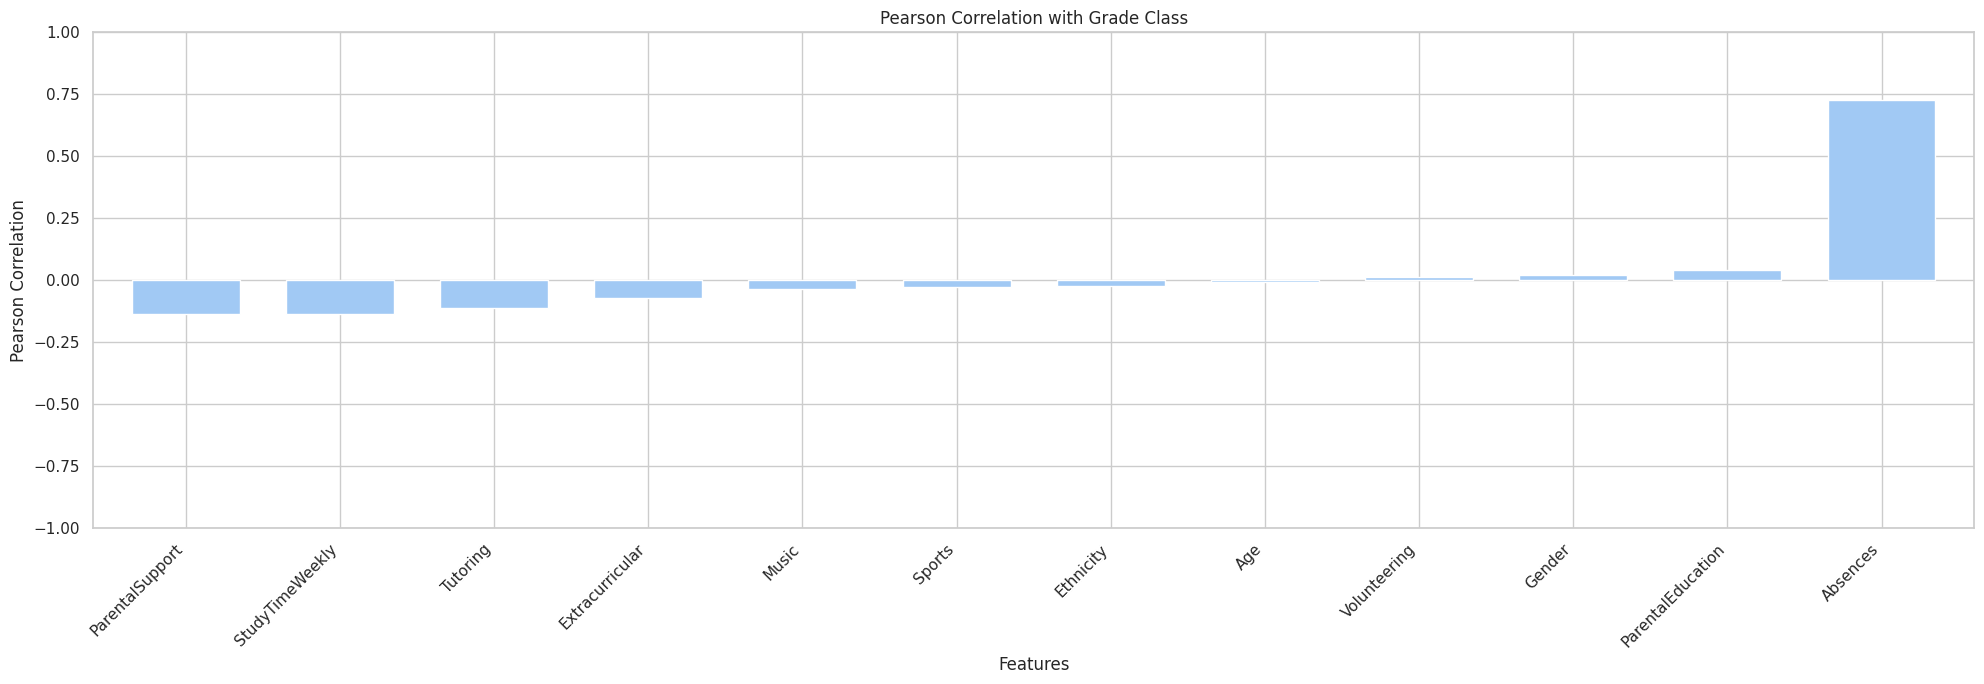

In [11]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['GradeClass'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Grade Class')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

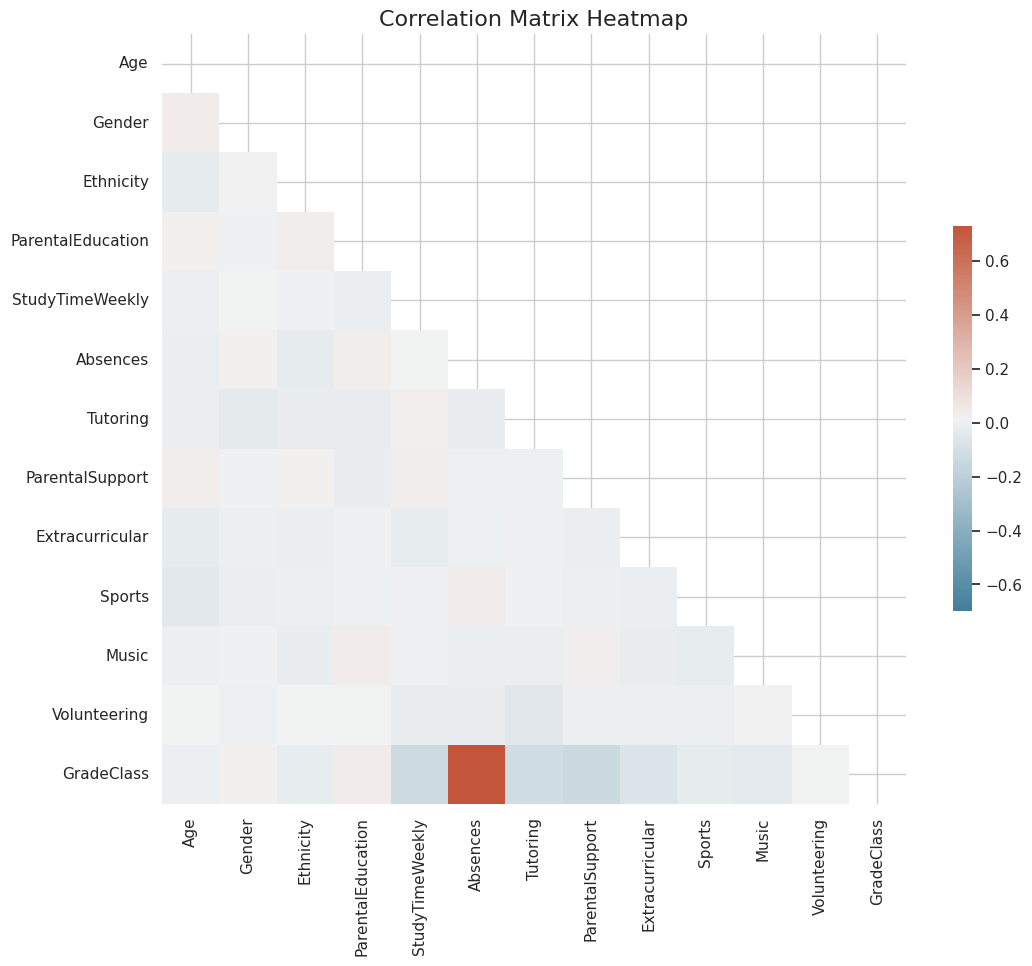

In [12]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Choose a diverging color scheme
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap=cmap, cbar_kws={"shrink": .5}, vmin=-0.7, mask=mask)
plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()

In [13]:
# Calculate the correlation with the Grade Class and find the strongest correlation
grade_class_corr = df.corr(numeric_only=True)['GradeClass'].drop('GradeClass')
strongest_correlation = grade_class_corr.idxmax()
strongest_correlation_value = grade_class_corr.max()

print(f"Grade Class ile en güçlü korelasyon {strongest_correlation} olup {strongest_correlation_value:.2f} değerine sahiptir")

Grade Class ile en güçlü korelasyon Absences olup 0.73 değerine sahiptir


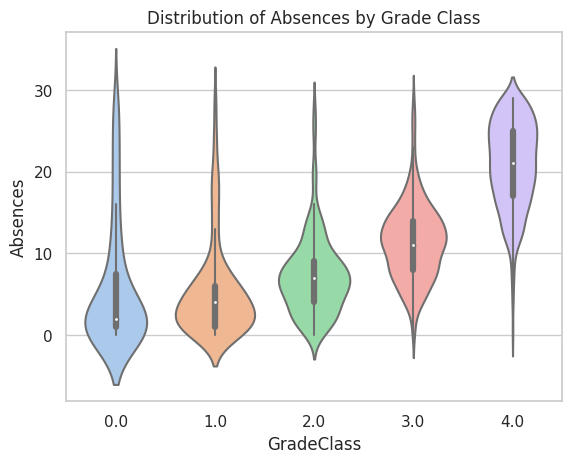

In [14]:
sns.violinplot(data=df, x='GradeClass', y='Absences')        
plt.title(f'Distribution of Absences by Grade Class')
plt.show()

- GradeClass ile yüksek korelasyon gösteren tek değişken, 0,73'lük pozitif korelasyona sahip Absences. Bu, daha fazla Absences daha yüksek bir GradeClass ile ilişkili olduğu anlamına gelir. Bu mantıklıdır çünkü veri setimizde en iyi not (A) 0 ile, en kötü not (F) ise 4 ile temsil edilir.
- Özellikler birbirleriyle korelasyonlu değildir, bu da çoklu doğrusallığın eksikliğini gösterdiği için faydalıdır ve her özelliğin analiz için benzersiz bilgi sağladığından emin olur.

**3.4. Aykırı Değerleri Keşfetmek**

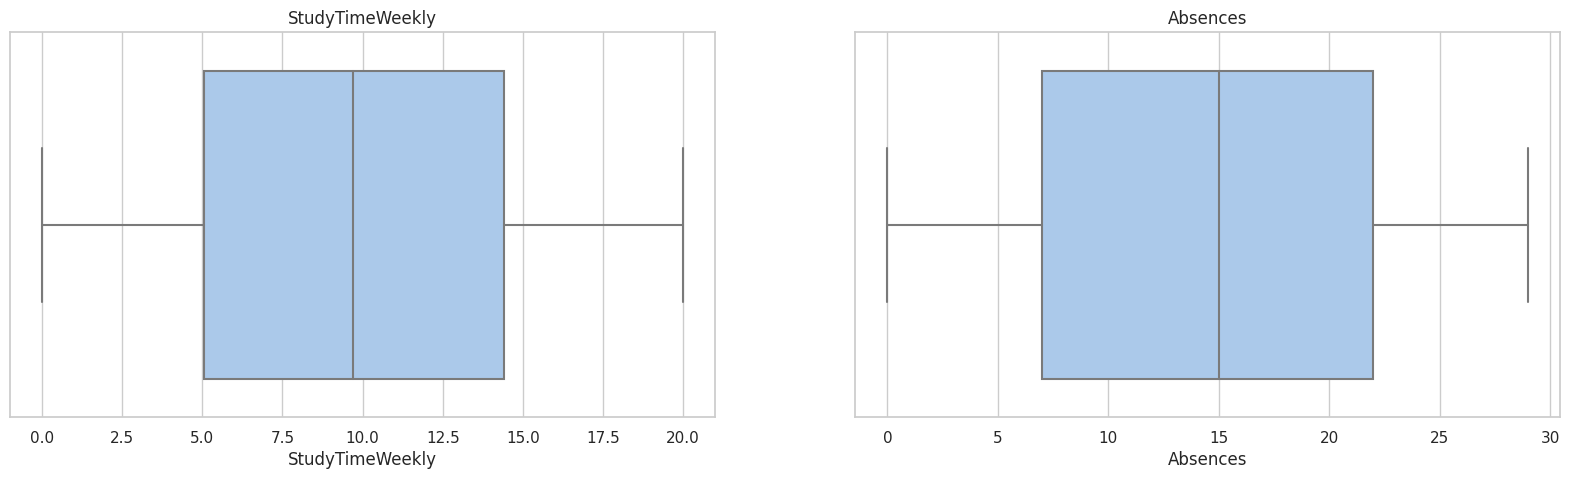

In [15]:
# Create a 1x2 subplot with a figure size of 20x5 inches
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Loop through the first two numerical columns in the DataFrame
for idx in range(2):
    # Create a boxplot for each column
    sns.boxplot(ax=ax[idx], x=df[numerical_columns[idx]])
    ax[idx].set_title(numerical_columns[idx])

- Veri setinde aykırı değer bulunmamaktadır.

**3.5. Hedef Değişkenin Dağılımı**

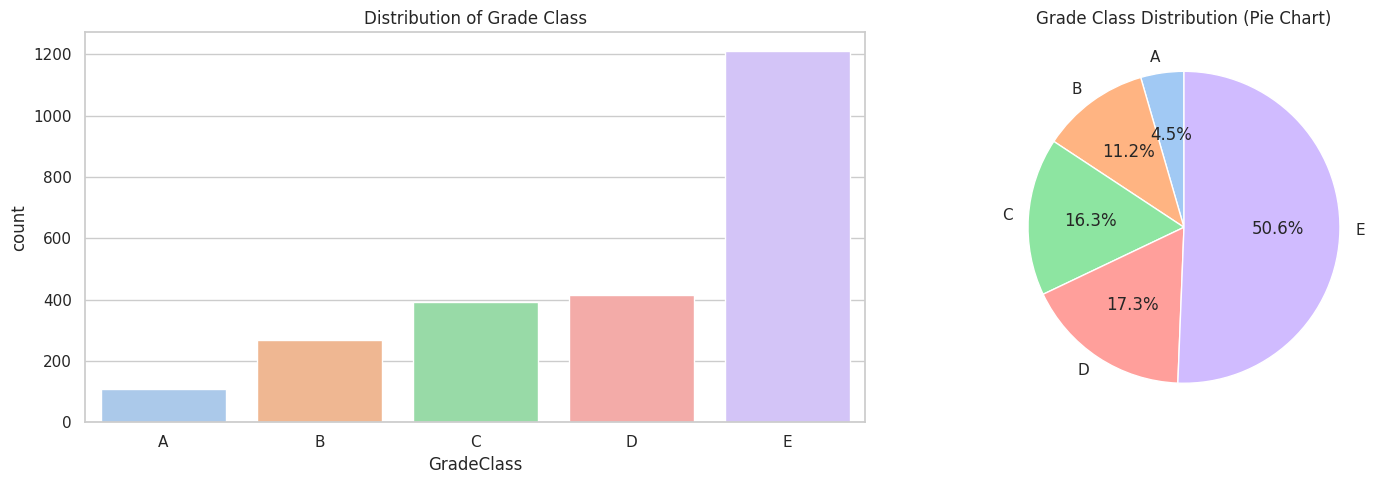

In [16]:
# Set custom labels
labels = ["A", "B", "C", "D", "E"]
ticks = range(len(labels))

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the count plot on the first subplot
sns.countplot(data=df, x='GradeClass', ax=axes[0])
axes[0].set_title('Distribution of Grade Class')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels)

# Calculate counts for the pie chart
grade_counts = df['GradeClass'].value_counts().sort_index()

# Plot the pie chart on the second subplot
axes[1].pie(grade_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[1].set_title('Grade Class Distribution (Pie Chart)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

- GradeClass dağılımı önemli bir dengesizliği ortaya koyuyor, Sınıf E veri setinin yaklaşık %50'sini oluşturuyor.
- Sınıf A'dan D'ye kadar olan sınıflar belirgin şekilde daha düşük frekanslar sergiliyor, Sınıf A sadece yaklaşık %4,5'i temsil ediyor.

**4. Veri Ön İşleme**

**4.1. Hedef Değişkenin Belirlenmesi**

In [17]:
# Separate features (X) and target variable (y)
X = df.loc[:, df.columns != "GradeClass"]
y = df['GradeClass']

**4.2. Veri Ölçekleme**

In [18]:
# Standardize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

**4.3. Train / Test Split**

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

**5. Modelleme**

In [20]:
# Instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)  # Set verbose=0 to suppress CatBoost output
}

Decision Tree accuracy: 0.62
Random Forest accuracy: 0.71
Gradient Boosting accuracy: 0.72
AdaBoost accuracy: 0.64
K-Nearest Neighbors accuracy: 0.54
Logistic Regression accuracy: 0.72
SGD Classifier accuracy: 0.64
Support Vector Machine accuracy: 0.70
XGBoost accuracy: 0.71
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1674, number of used features: 12
[LightGBM] [Info] Start training from score -3.105483
[LightGBM] [Info] Start training from score -2.186529
[LightGBM] [Info] Start training from score -1.809843
[LightGBM] [Info] Start training from score -1.753090
[LightGBM] [Info] Start training from score -0.681271
LightGBM accuracy: 0.71
CatBoost accuracy: 0.72


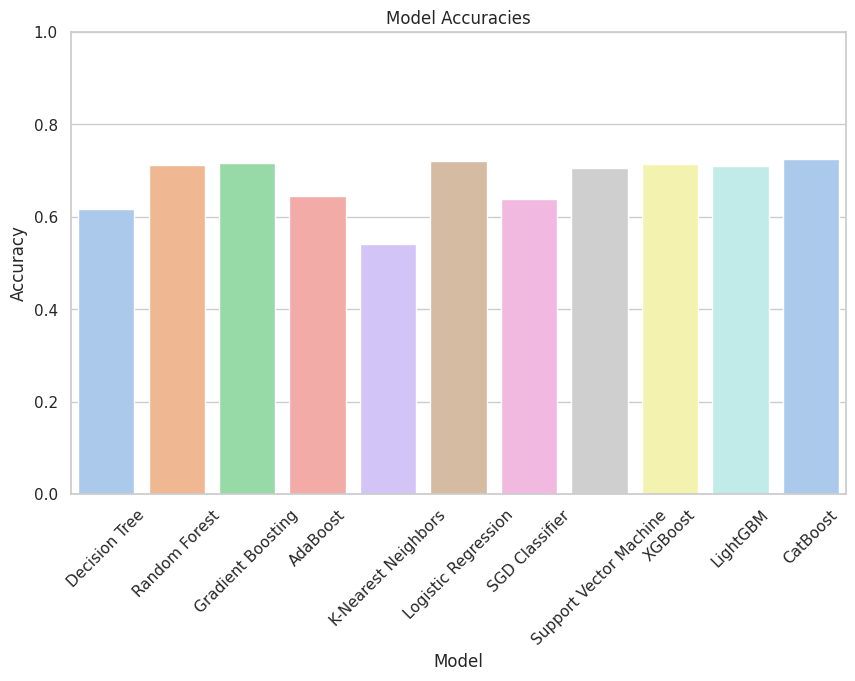

In [21]:
model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models, palette='pastel')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'depth': 3, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best cross-validation F1-score: 0.7270
Accuracy = 0.7368, F1-score = 0.5973
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.25      0.36        32
         1.0       0.58      0.62      0.60        81
         2.0       0.55      0.57      0.56       117
         3.0       0.55      0.56      0.55       124
         4.0       0.90      0.92      0.91       364

    accuracy                           0.74       718
   macro avg       0.65      0.58      0.60       718
weighted avg       0.74      0.74      0.73       718



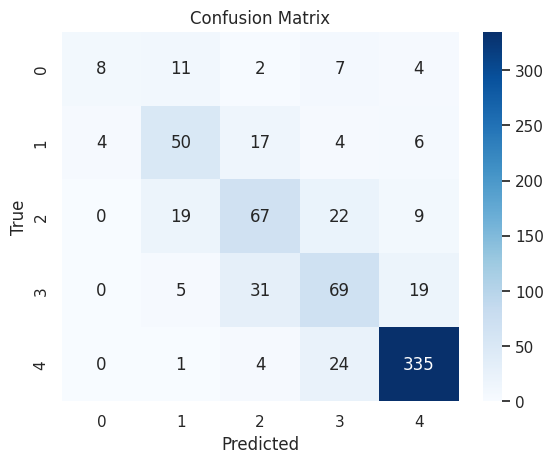

In [22]:
# Define your chosen model
model = CatBoostClassifier(verbose=0)

# Define parameter grid for GridSearchCV
param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.1, 0.01],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform GridSearchCV with 5-fold cross-validation 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Use the best model found by GridSearchCV for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print accuracy and F1-score on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

- Sonuç ilk bakışta etkileyici görünebilir. Bununla birlikte, hedef değişkenimiz olan Grade_Class gpa' 'sütununu hariç tuttuğumuzu hatırlamak önemlidir. Hedefimiz, diğer mevcut özellikleri kullanarak Grade_Class tahmin etmekte ve bunu 0.74 doğruluk puanı ile başarıyla başardık.

 **6. Tahmin Sonuçlarının JSON Formatına Hazırlanması (AI öneri sistemi için)**